In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('eng_pp_9523_eda_pivoted.csv')

In [3]:
# General information about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22653986 entries, 0 to 22653985
Data columns (total 15 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Unnamed: 0     int64 
 1   Year           int64 
 2   Month          object
 3   price          int64 
 4   Old/New        object
 5   Detached       int64 
 6   Semi-detached  int64 
 7   Terraced       int64 
 8   Flat           int64 
 9   Others         int64 
 10  Street         object
 11  Locality       object
 12  Town/City      object
 13  District       object
 14  County         object
dtypes: int64(8), object(7)
memory usage: 2.5+ GB
None


In [4]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0             0
Year                   0
Month                  0
price                  0
Old/New                0
Detached               0
Semi-detached          0
Terraced               0
Flat                   0
Others                 0
Street            345537
Locality         8182296
Town/City              0
District               0
County                 0
dtype: int64


In [5]:
# Descriptive statistics for numerical features (price)
print(df["price"].describe())

count    2.265399e+07
mean     2.319479e+05
std      9.777407e+05
min      1.000000e+00
25%      8.750000e+04
50%      1.550000e+05
75%      2.550000e+05
max      5.943000e+08
Name: price, dtype: float64


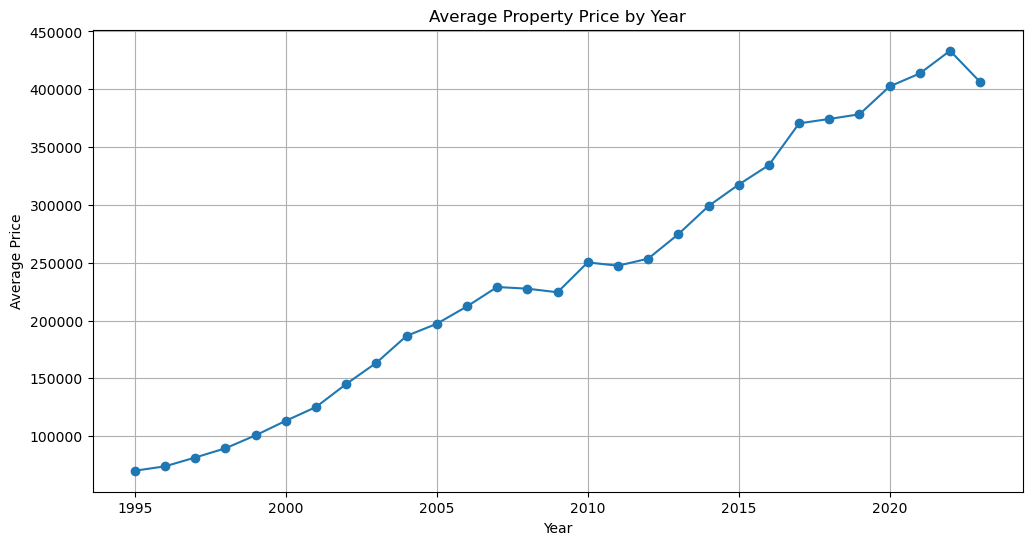

In [6]:
# Analyze price distribution over time
plt.figure(figsize=(12, 6))
plt.plot(df.groupby("Year")["price"].mean(), marker="o")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.title("Average Property Price by Year")
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

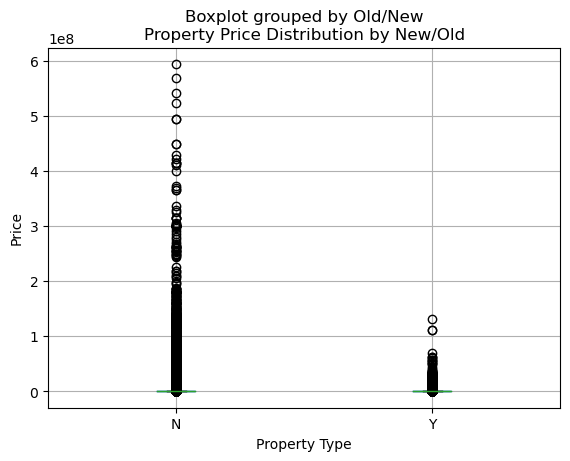

In [7]:
# Analyze price distribution by property type
plt.figure(figsize=(10, 6))
df.boxplot(by="Old/New", column="price")
plt.xlabel("Property Type")
plt.ylabel("Price")
plt.title("Property Price Distribution by New/Old")
plt.grid(True)
plt.show()

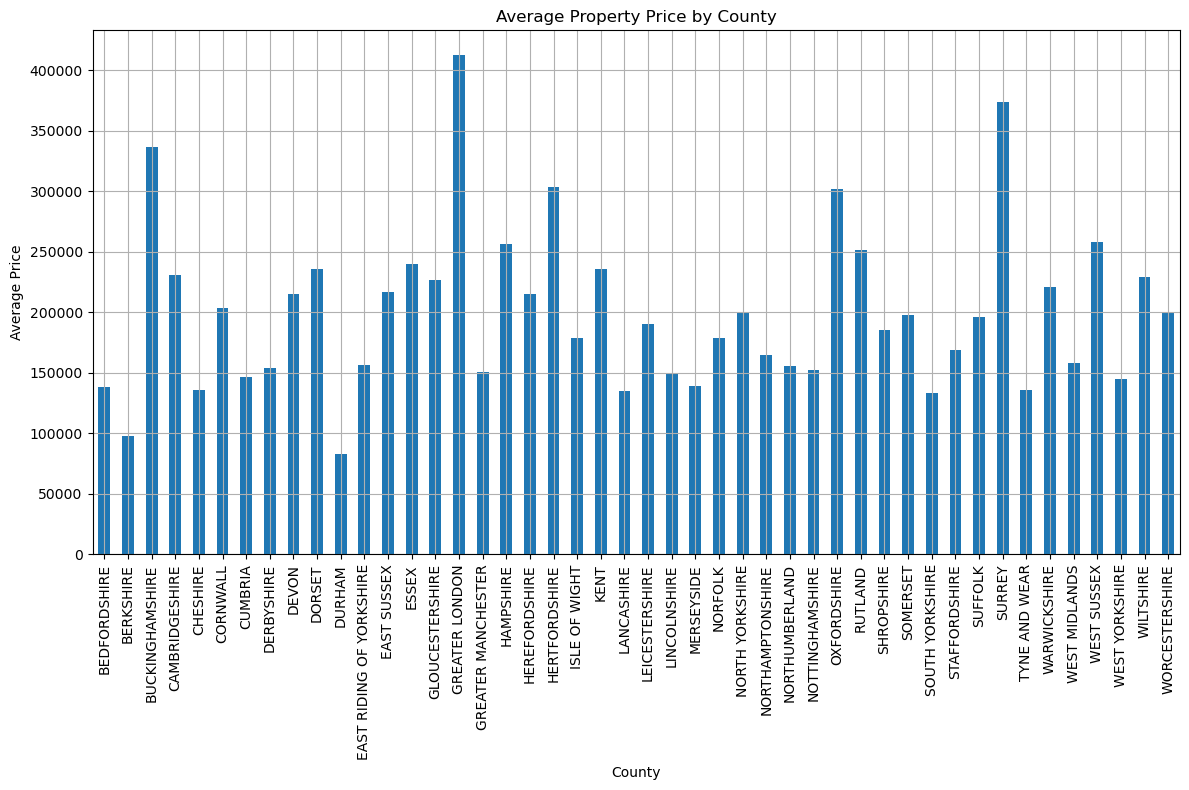

In [8]:
# Analyze price distribution by location (e.g., County)
plt.figure(figsize=(12, 8))
df.groupby("County")["price"].mean().plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel("County")
plt.ylabel("Average Price")
plt.title("Average Property Price by County")
plt.grid(True)
plt.tight_layout()
plt.show()

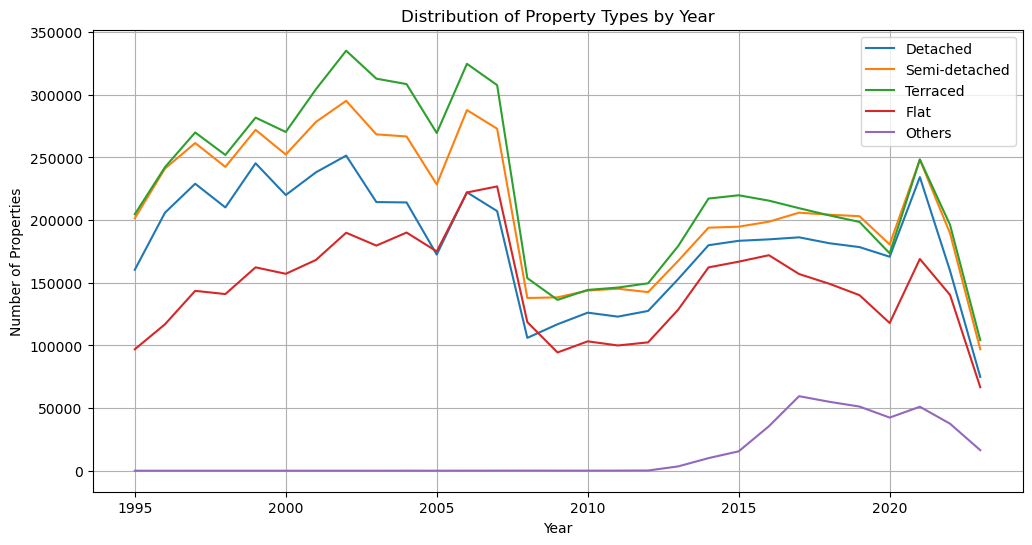

In [9]:
# Analyze the distribution of different property types over time
plt.figure(figsize=(12, 6))
for col in ["Detached", "Semi-detached", "Terraced", "Flat", "Others"]:
    plt.plot(df.groupby("Year")[col].sum(), label=col)
plt.xlabel("Year")
plt.ylabel("Number of Properties")
plt.title("Distribution of Property Types by Year")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
Detachment = df[['Detached', 'Semi-detached', 'Terraced', 'Flat', 'Others' ]]

<Figure size 1000x600 with 0 Axes>

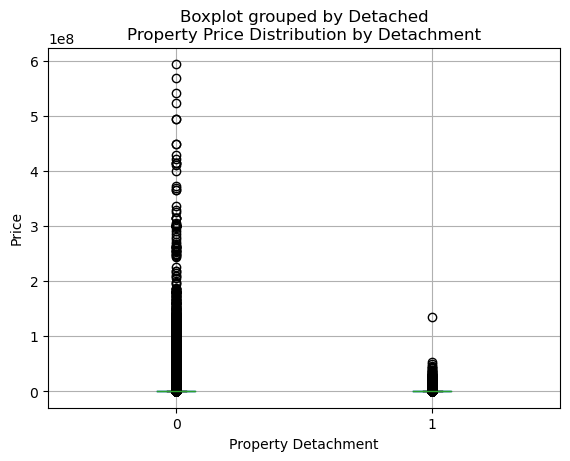

In [11]:
# Analyze the relationship between price and property type
plt.figure(figsize=(10, 6))
df.boxplot(by= 'Detached', column="price")
plt.xlabel("Property Detachment")
plt.ylabel("Price")
plt.title("Property Price Distribution by Detachment")
plt.grid(True)
plt.show()


In [15]:
df.set_index('Year')

,Unnamed: 0,Month,price,Old/New,Detached,Semi-detached,Terraced,Flat,Others,Street,Locality,Town/City,District,County
Year,,,,,,,,,,,,,,
1995,0,February,44500,N,0,0,1,0,0,HOWICK PARK,SUNDERLAND,SUNDERLAND,SUNDERLAND,TYNE AND WEAR
1995,1,January,56500,N,0,0,1,0,0,BRICK KILN CLOSE,COGGESHALL,COLCHESTER,BRAINTREE,ESSEX
1995,2,July,58000,N,0,0,1,0,0,RAINSBROOK DRIVE,SHIRLEY,SOLIHULL,SOLIHULL,WEST MIDLANDS
1995,3,June,51000,N,0,1,0,0,0,MERRY HILL,BRIERLEY HILL,BRIERLEY HILL,DUDLEY,WEST MIDLANDS
1995,4,March,17000,N,0,0,1,0,0,DENMAN STREET,ROTHERHAM,ROTHERHAM,ROTHERHAM,SOUTH YORKSHIRE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22653981,January,158000,N,0,1,0,0,0,LONGFELLOW DRIVE,NaN,WORKSOP,BASSETLAW,NOTTINGHAMSHIRE
2023,22653982,May,172000,N,0,1,0,0,0,EARLSWOOD DRIVE,NaN,MANSFIELD,MANSFIELD,NOTTINGHAMSHIRE
2023,22653983,April,272000,N,1,0,0,0,0,CASTLETON AVENUE,ARNOLD,NOTTINGHAM,GEDLING,NOTTINGHAMSHIRE


In [16]:
#Average Property Price by Year
df2 = df.groupby("Year")["price"].mean()

In [17]:
df2

Year
1995     70121.778192
1996     73913.936406
1997     81538.516458
1998     89495.533644
1999    100726.772412
2000    113295.685820
2001    125169.268502
2002    145085.875163
2003    163445.377027
2004    186700.355475
2005    197172.896443
2006    212172.418164
2007    228994.611245
2008    227538.020498
2009    224431.987347
2010    250279.327735
2011    247395.285133
2012    253477.869469
2013    274615.636678
2014    298972.105186
2015    317545.162826
2016    334382.569775
2017    370483.503400
2018    374297.960357
2019    378342.079055
2020    402439.421146
2021    413668.480495
2022    433298.900451
2023    406119.248863
Name: price, dtype: float64

In [18]:
#Average Property Price by County
df3 = df.groupby("County")["price"].mean()

In [19]:
df3

County
BEDFORDSHIRE                137875.913333
BERKSHIRE                    97470.941686
BUCKINGHAMSHIRE             336544.465669
CAMBRIDGESHIRE              231121.888623
CHESHIRE                    135894.467857
CORNWALL                    203176.271406
CUMBRIA                     146691.218213
DERBYSHIRE                  153570.577627
DEVON                       214801.157092
DORSET                      235812.961909
DURHAM                       83270.806363
EAST RIDING OF YORKSHIRE    156525.753497
EAST SUSSEX                 216859.388373
ESSEX                       239569.199135
GLOUCESTERSHIRE             226597.382998
GREATER LONDON              412187.087347
GREATER MANCHESTER          150718.236111
HAMPSHIRE                   256004.878301
HEREFORDSHIRE               215410.479389
HERTFORDSHIRE               303439.498632
ISLE OF WIGHT               178538.200481
KENT                        235966.029549
LANCASHIRE                  134839.492419
LEICESTERSHIRE             

In [32]:
#Average Property Type Transaction by County
df3_Terraced = df.groupby("County")[["Detached", "Semi-detached", "Terraced", "Flat", "Others" ]]